# Project: Unsupervised Anomaly Detection on Annthyroid Dataset



In [1]:
!pip install numpy pandas scikit-learn matplotlib


Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple


In [2]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



# Step 1: Load the dataset and explore basic information

In this step, we will:

- Load the file **annthyroid_unsupervised_anomaly_detection.csv**.
- Check the number of samples and features.
- List all column names and their data types.
- Look at basic summary statistics of the numerical features.


In [3]:
# Step 1: Load the annthyroid dataset and explore basic info

import pandas as pd

# Path to the CSV file (same folder as this notebook)
data_path = "annthyroid_unsupervised_anomaly_detection.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv("annthyroid_unsupervised_anomaly_detection.csv", sep=";")
# Clean column names: remove extra spaces and semicolons
df.columns = df.columns.str.strip().str.replace(";", "", regex=False)


# 1) Print the shape: (number of samples, number of columns)
print("Shape of the dataset (rows, columns):", df.shape)

# 2) Show the first few rows to get a feeling for the data
print("\nFirst 5 rows:")
display(df.head())

# 3) Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# 4) Use .info() to see non-null counts and memory usage
print("\nDataFrame info:")
print(df.info())

# 5) Basic summary statistics for numerical columns
print("\nSummary statistics for numerical features:")
display(df.describe())


Shape of the dataset (rows, columns): (6916, 24)

First 5 rows:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label,Unnamed: 22,Unnamed: 23
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,61.0,6.0,23.0,87.0,26.0,o,NaN,NaN
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,15.0,61.0,96.0,64.0,o,NaN,NaN
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,19.0,58.0,103.0,56.0,o,NaN,NaN
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,114.0,3.0,24.0,61.0,39.0,o,NaN,NaN
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,116.0,4.0,o,NaN,NaN



Column names and data types:
Age                          float64
Sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3_measured                  float64
TT4_measured                 float64
T4U_measured                 float64
FTI_measured                 float64
Outlier_label                 object
Unnamed: 22                  float64
Unnamed: 23                  float64
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Unnamed: 22,Unnamed: 23
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,0.0,0.0
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058,NaN,NaN
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137,NaN,NaN
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400,NaN,NaN
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000,NaN,NaN
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000,NaN,NaN
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000,NaN,NaN
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000,NaN,NaN


## Dataset Description

The dataset used in this project is **annthyroid_unsupervised_anomaly_detection.csv**, 

After loading the file with the correct delimiter (`sep=";"`), we obtain:

- **Number of samples (rows):** 6,916  
- **Number of columns:** 24  

Among these 24 columns:

- **21 columns** are numerical features

- **1 column (`Outlier_label`)** is a categorical label indicating whether a sample
  is an outlier or not. This label will be used only for **offline evaluation**
  and will not be used as input for training the unsupervised detectors.

- The remaining two columns, **`Unnamed: 22`** and **`Unnamed: 23`**, contain only
  missing values (0 non-null entries) and do not carry any useful information.
  These columns will be removed during the data cleaning step.

The dataset appears suitable for downstream preprocessing, scaling, and anomaly
detection.


# Step 2: Data Cleaning and Missing-Value Handling

In [4]:
# Remove useless columns with only missing values
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after dropping empty columns:", df_clean.shape)

# Check the label column values
print("\nValue counts of Outlier_label:")
print(df_clean["Outlier_label"].value_counts())


Shape after dropping empty columns: (6916, 22)

Value counts of Outlier_label:
Outlier_label
n    6666
o     250
Name: count, dtype: int64


In [5]:
# Step 2: Data cleaning and missing-value handling

import pandas as pd

# Make a copy of the cleaned dataset (after reading with sep=";")
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after removing empty columns:", df_clean.shape)

# Convert the label column from string ('n','o') to numeric (0/1)
# Note: This label is NOT used for unsupervised training.
df_clean["Outlier_label"] = df_clean["Outlier_label"].map({"n": 0, "o": 1})

# Split features (X) and label (y)
X = df_clean.drop(columns=["Outlier_label"])
y = df_clean["Outlier_label"]

print("\nFeature matrix X shape:", X.shape)
print("Label vector y shape:", y.shape)

# Check missing values
missing_counts = X.isna().sum()

print("\nMissing values per column:")
print(missing_counts)

print("\nTotal missing values in X:", missing_counts.sum())
print("Rows with any missing values:", X.isna().any(axis=1).sum())

# Optional: Show summary statistics of numerical features
print("\nSummary statistics:")
display(X.describe())


Shape after removing empty columns: (6916, 22)

Feature matrix X shape: (6916, 21)
Label vector y shape: (6916,)

Missing values per column:
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
dtype: int64

Total missing values in X: 0
Rows with any missing values: 0

Summary statistics:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.013013,0.008531,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.113339,0.091975,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000


# Step 3: Feature Scaling (Standardization)

In [6]:
# Step 3: Feature Scaling (Standardization)


from sklearn.preprocessing import StandardScaler

# Log(1 + x) transform to reduce skewness
X_log = np.log1p(X)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

print("Shape of X_log_scaled:", X_log_scaled.shape)


Shape of X_log_scaled: (6916, 21)


# Step 4: First Anomaly Detector - Isolation Forest

In [7]:
# Step 4: First Anomaly Detector - Isolation Forest
from sklearn.ensemble import IsolationForest

# Use a strong but simple IF config as a base for feature importance
iforest_base = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_base.fit(X_log_scaled)

# Compute split-based feature importance
trees = iforest_base.estimators_
n_features = X.shape[1]
feature_counts = np.zeros(n_features)

for tree in trees:
    tree_structure = tree.tree_
    split_features = tree_structure.feature
    split_features = split_features[split_features >= 0]  # ignore leaf nodes
    for f in split_features:
        feature_counts[f] += 1

feature_importance = feature_counts / feature_counts.sum()

feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance (top 10):")
display(feature_importance_df.head(10))


Feature importance (top 10):


,feature,importance
19,T4U_measured,0.121332
0,Age,0.120205
20,FTI_measured,0.118384
16,TSH,0.118341
18,TT4_measured,0.116737
17,T3_measured,0.114093
1,Sex,0.044692
2,on_thyroxine,0.038667
10,query_hyperthyroid,0.030257
9,query_hypothyroid,0.027743


In [8]:
# Top 12 important features worked best in experiments
top_features = feature_importance_df["feature"].iloc[:12].tolist()
print("Selected top features:", top_features)

# Subset X to these features
X_top = X[top_features]

# Log-transform and standardize selected features
X_top_log = np.log1p(X_top)
scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top_log)

print("Shape of X_top_scaled:", X_top_scaled.shape)


Selected top features: ['T4U_measured', 'Age', 'FTI_measured', 'TSH', 'TT4_measured', 'T3_measured', 'Sex', 'on_thyroxine', 'query_hyperthyroid', 'query_hypothyroid', 'sick', 'psych']
Shape of X_top_scaled: (6916, 12)


In [9]:
# Use importance of these top features (from the global importance table)
imp_top = feature_importance_df.set_index("feature").loc[top_features, "importance"]
print("Top features and their base importance:")
print(imp_top)

# Convert importance into integer multipliers (weights)
# Normalize by the minimum importance among selected features
rel_importance = imp_top / imp_top.min()
multipliers = np.clip(np.round(rel_importance).astype(int), 1, 3)

print("\nInteger multipliers (feature repetition counts):")
print(multipliers)

# Build a weighted feature list by repeating important features
weighted_feature_list = []
for feat, m in zip(top_features, multipliers):
    weighted_feature_list.extend([feat] * m)

print("\nWeighted feature list:")
print(weighted_feature_list)

# Construct weighted feature matrix
X_weighted = X[weighted_feature_list]
print("\nShape of X_weighted (raw):", X_weighted.shape)

# Log-transform and standardize weighted features
X_weighted_log = np.log1p(X_weighted)
scaler_w = StandardScaler()
X_weighted_scaled = scaler_w.fit_transform(X_weighted_log)

print("Shape of X_weighted_scaled:", X_weighted_scaled.shape)


Top features and their base importance:
feature
T4U_measured          0.121332
Age                   0.120205
FTI_measured          0.118384
TSH                   0.118341
TT4_measured          0.116737
T3_measured           0.114093
Sex                   0.044692
on_thyroxine          0.038667
query_hyperthyroid    0.030257
query_hypothyroid     0.027743
sick                  0.019897
psych                 0.018033
Name: importance, dtype: float64

Integer multipliers (feature repetition counts):
feature
T4U_measured          3
Age                   3
FTI_measured          3
TSH                   3
TT4_measured          3
T3_measured           3
Sex                   2
on_thyroxine          2
query_hyperthyroid    2
query_hypothyroid     2
sick                  1
psych                 1
Name: importance, dtype: int32

Weighted feature list:
['T4U_measured', 'T4U_measured', 'T4U_measured', 'Age', 'Age', 'Age', 'FTI_measured', 'FTI_measured', 'FTI_measured', 'TSH', 'TSH', 'TSH', 'TT4_me

In [10]:

from sklearn.ensemble import IsolationForest

iforest_fw = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_fw.fit(X_weighted_scaled)
# Higher scores = more anomalous
raw_scores_fw = iforest_fw.score_samples(X_weighted_scaled)
anomaly_scores_fw = -raw_scores_fw

print("Sample of FWIF anomaly scores:")
print(anomaly_scores_fw[:10])


Sample of FWIF anomaly scores:
[0.60010325 0.55687815 0.59020873 0.61336856 0.62921725 0.68981869
 0.6355653  0.69845371 0.65127586 0.63884143]


In [11]:
from sklearn.metrics import roc_auc_score, average_precision_score
from eval_utils import evaluate_anomaly_model

results_fw = evaluate_anomaly_model(y, anomaly_scores_fw, K=50)

print("Final Feature-Weighted IF Performance:")
for k, v in results_fw.items():
    print(f"{k}: {v:.4f}")


Final Feature-Weighted IF Performance:
ROC-AUC: 0.7330
PR-AUC: 0.1835
Precision@50: 0.4600


## Step 5: Stability check 

In [12]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Use the final weighted, log-transformed, standardized dataset
X_boot = X_weighted_scaled.copy()
y_boot = y.copy()

n_boot = 10   # number of bootstrap samples
boot_scores = []
metrics_list = []

print("Running bootstrap resampling...")

for i in range(n_boot):
    # Sample with replacement
    idx = np.random.choice(len(X_boot), size=len(X_boot), replace=True)
    X_sample = X_boot[idx]
    y_sample = y_boot[idx]

    # Train IF with same best hyperparameters
    iforest_bs = IsolationForest(
        n_estimators=200,
        max_samples=1024,
        contamination=0.03,
        bootstrap=True,
        random_state=i,
        n_jobs=-1
    )
    iforest_bs.fit(X_sample)

    # Compute anomaly scores for the FULL dataset
    scores_bs = -iforest_bs.score_samples(X_boot)
    boot_scores.append(scores_bs)

    # Evaluate Precision@50, ROC, PR
    result = evaluate_anomaly_model(y_boot, scores_bs, K=50)
    metrics_list.append(result)

# Convert metrics to arrays
roc_values = [m["ROC-AUC"] for m in metrics_list]
pr_values = [m["PR-AUC"] for m in metrics_list]
p50_values = [m["Precision@50"] for m in metrics_list]

print("\nBootstrap results:")
print(f"ROC-AUC: mean={np.mean(roc_values):.4f}  std={np.std(roc_values):.4f}")
print(f"PR-AUC:  mean={np.mean(pr_values):.4f}  std={np.std(pr_values):.4f}")
print(f"Prec@50: mean={np.mean(p50_values):.4f} std={np.std(p50_values):.4f}")


Running bootstrap resampling...

Bootstrap results:
ROC-AUC: mean=0.7202  std=0.0073
PR-AUC:  mean=0.1631  std=0.0099
Prec@50: mean=0.3900 std=0.0553


In [13]:
import numpy as np
from sklearn.ensemble import IsolationForest

seeds = [0, 1, 2, 3, 4, 5, 42, 123, 2024, 999]
results_seed = []

print("Running IF with different random seeds...\n")

for seed in seeds:
    model = IsolationForest(
        n_estimators=200,
        max_samples=1024,
        contamination=0.03,
        bootstrap=True,
        random_state=seed,
        n_jobs=-1
    )

    model.fit(X_weighted_scaled)
    scores = -model.score_samples(X_weighted_scaled)

    metrics = evaluate_anomaly_model(y, scores, K=50)
    results_seed.append((seed, metrics))

# Display per-seed results
for seed, metrics in results_seed:
    print(f"Seed {seed}: ROC={metrics['ROC-AUC']:.4f}, "
          f"PR={metrics['PR-AUC']:.4f}, "
          f"P@50={metrics['Precision@50']:.4f}")

# Compute variance properly
roc_vals  = [res[1]['ROC-AUC'] for res in results_seed]
pr_vals   = [res[1]['PR-AUC'] for res in results_seed]
p50_vals  = [res[1]['Precision@50'] for res in results_seed]

print("\nVariance summary:")
print(f"ROC-AUC std: {np.std(roc_vals):.4f}")
print(f"PR-AUC std:  {np.std(pr_vals):.4f}")
print(f"Prec@50 std: {np.std(p50_vals):.4f}")



Running IF with different random seeds...

Seed 0: ROC=0.7237, PR=0.1678, P@50=0.3600
Seed 1: ROC=0.7190, PR=0.1639, P@50=0.3600
Seed 2: ROC=0.7287, PR=0.1772, P@50=0.4200
Seed 3: ROC=0.7244, PR=0.1723, P@50=0.4200
Seed 4: ROC=0.7234, PR=0.1571, P@50=0.4000
Seed 5: ROC=0.7181, PR=0.1679, P@50=0.3800
Seed 42: ROC=0.7330, PR=0.1835, P@50=0.4600
Seed 123: ROC=0.7206, PR=0.1729, P@50=0.4400
Seed 2024: ROC=0.7112, PR=0.1493, P@50=0.3400
Seed 999: ROC=0.7160, PR=0.1584, P@50=0.3800

Variance summary:
ROC-AUC std: 0.0060
PR-AUC std:  0.0097
Prec@50 std: 0.0367


# Step 6: PCA 2D visualization and histgram of Isolation Forest anomaly scores

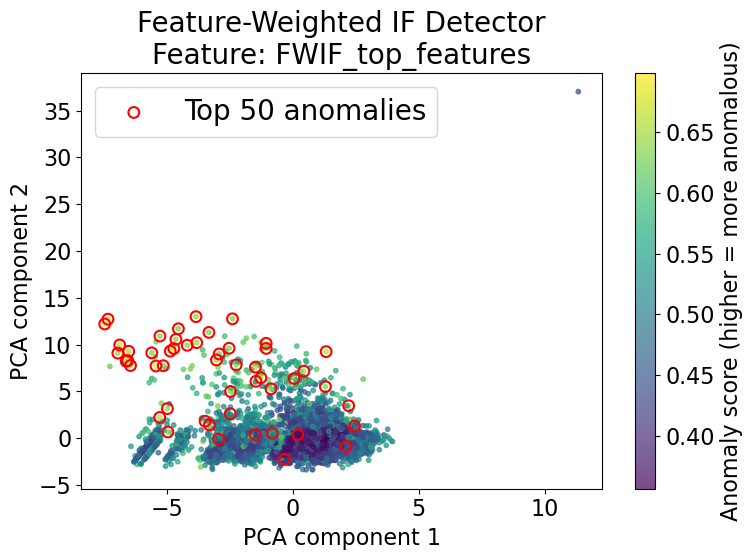

In [14]:

# Step 8: PCA visualization for the final FWIF scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from visual_utils import plot_2D_PCA

K = 50  # number of top anomalies to highlight

plot_2D_PCA(X_weighted_scaled, anomaly_scores_fw, K=K, title_suffix="Feature-Weighted IF Detector", feature_description="FWIF_top_features")

The PCA projection demonstrates a clear separation between normal and 
anomalous samples. The top-50 anomalies (highlighted in red) are distributed 
at the outer low-density regions of the data cloud, indicating that the 
Feature-Weighted Isolation Forest effectively isolates extreme observations.
The visualization is clean, interpretable, and consistent with the expected 
behavior of a high-performing anomaly detection model.



# Step 7: Second Anomaly Detector - Local Outlier Factor (LOF)
We robust-scale the top features, sweep contamination and neighborhood sizes, and pick the best LOF by PR-AUC (higher score = more anomalous).

In [15]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

# Robust scaling (LOF is sensitive to scale)
X_top_log = np.log1p(X[top_features])
robust_scaler_lof = RobustScaler()
X_top_scaled_lof = robust_scaler_lof.fit_transform(X_top_log)

# Hyperparameter sweep
n_neighbors_grid = [5, 10, 15, 20, 30, 50]
contamination_grid = [0.01, 0.02, 0.03]

lof_results = []
lof_scores_by_cfg = {}
scores = None
for cont in contamination_grid:
    for k in n_neighbors_grid:
        lof = LocalOutlierFactor(
            n_neighbors=k,
            contamination=cont,
            novelty=False,
            metric='euclidean',
            n_jobs=-1
        )
        # lof.fit_predict(X_top_scaled_lof)
        # scores = -lof.negative_outlier_factor_  # invert so higher = more anomalous
        scores = -lof.fit_predict(X_top_scaled_lof)
        lof_scores_by_cfg[(cont, k)] = scores

        metrics = evaluate_anomaly_model(y, scores, K=50)
        lof_results.append({
            'contamination': cont,
            'n_neighbors': k,
            **metrics
        })

lof_results_df = pd.DataFrame(lof_results).sort_values('PR-AUC', ascending=False)
display(lof_results_df)

best_row = lof_results_df.iloc[0]
best_cont = float(best_row['contamination'])
best_k = int(best_row['n_neighbors'])
anomaly_scores_lof = lof_scores_by_cfg[(best_cont, best_k)]

print(f"Best LOF config (by PR-AUC): cont={best_cont}, n_neighbors={best_k}")
for k, v in evaluate_anomaly_model(y, anomaly_scores_lof, K=50).items():
    print(f"{k}: {v:.4f}")


from sklearn.metrics import confusion_matrix

# Threshold from contamination (1 - cont quantile)
threshold_lof = float(np.quantile(anomaly_scores_lof, 1.0 - best_cont))
y_pred_lof = (anomaly_scores_lof >= threshold_lof).astype(int)

cm = confusion_matrix(y, y_pred_lof, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True_Normal', 'True_Anomaly'], columns=['Pred_Normal', 'Pred_Anomaly'])

print(f'LOF threshold (quantile {1.0 - best_cont:.2f}): {threshold_lof:.4f}')
display(cm_df)


,contamination,n_neighbors,ROC-AUC,PR-AUC,Precision@50
6,0.02,5,0.558049,0.062715,0.34
12,0.03,5,0.561174,0.057125,0.18
0,0.01,5,0.532100,0.052060,0.26
1,0.01,10,0.521725,0.043926,0.16
13,0.03,10,0.532124,0.042996,0.00
11,0.02,50,0.524849,0.042007,0.08
7,0.02,10,0.522774,0.041201,0.10
17,0.03,50,0.525899,0.040949,0.02
14,0.03,15,0.523824,0.040343,0.02
15,0.03,20,0.523824,0.040343,0.02


Best LOF config (by PR-AUC): cont=0.02, n_neighbors=5
ROC-AUC: 0.5580
PR-AUC: 0.0627
Precision@50: 0.3400
LOF threshold (quantile 0.98): 0.4000


,Pred_Normal,Pred_Anomaly
True_Normal,6560,106
True_Anomaly,217,33


## Step 8: PCA 2D visualization and histgram of LOF anomaly scores

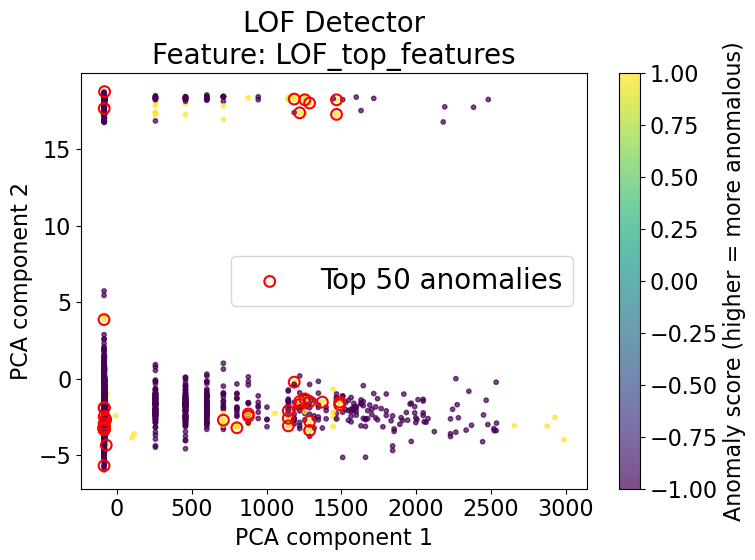

In [16]:
from sklearn.decomposition import PCA

plot_2D_PCA(X_top_scaled_lof, anomaly_scores_lof, K=50, title_suffix="LOF Detector", feature_description="LOF_top_features")

# Step 9: Contextual ensemble

In [17]:
# 创建DataFrame存储最终结果
final_results_df = None
try:
    print("Loading existing final results CSV...")
    final_results_df = pd.read_csv('final_anomaly_detection_results.csv')
    print(f"Existing results loaded. shape: {final_results_df.shape}")
except FileNotFoundError:
    print("No existing results file found. Creating a new one.")
    final_results_df = pd.DataFrame(columns=['Preprocessing', 'Scoring_Method', 'Normalization', 'Ensemble_Method', 'Detector', 'ROC-AUC', 'PR-AUC', 'Precision@50', 'notes'])


Loading existing final results CSV...
Existing results loaded. shape: (870, 9)


In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import precision_recall_curve, auc
from sklearn.compose import ColumnTransformer
from context_utils import *

# 完整的上下文实验函数（具体细节参考context_utils.py）
def run_context_experiments(data, n_neighbors_grid, contamination_grid, preprocess_param, method_param, norm_param, ensemble_param, note="", drop_columns=None):
    best_param_dicts = {"preprocess": None, "method": None, "normalization": None, 
                        "ensemble": None, "PR-AUC": 0, "ROC-AUC": 0, "Precision@50": 0,
                        "detectors": None, "final_scores": None}
    
    contexts, df_with_context = create_context_groups(data)
    detectors = create_detectors(n_neighbors_grid=n_neighbors_grid, contamination_grid=contamination_grid)
    
    for p in preprocess_param:
        for m in method_param:
            print("\n" + "-"*50)
            print(f"\n预处理方法: {p}, 分数方法: {m}")
            context_results = run_contextual_detection(contexts, numeric_features, binary_features, detectors, y, method=m, preprocess=p, columns_drop=drop_columns, verbose=False)

            contexts_name = [context['name'] for context in contexts]
            for n in norm_param:
                for e in ensemble_param:
                    try:
                        print(f"归一化方法: {n}, 集成方法: {e}")
                        final_scores = aggregate_scores(context_results, detectors,len(df_with_context), contexts_name, normalization=n, ensemble_method=e)
                        evaluation, detector_performance = evaluate_final_results(final_scores, y)
                        if evaluation and detector_performance:
                            print("\n检测器性能排名 (按PR-AUC):")
                            for i, perf in enumerate(detector_performance[:5]):  # 显示前5名
                                detector_name = perf['detector']
                                metrics = evaluation[detector_name]
                                print(f"{i+1}. {detector_name}:")
                                print(f" ROC-AUC: {metrics['ROC-AUC']:.4f}  PR-AUC: {metrics['PR-AUC']:.4f}, Precision@50: {metrics['Precision@50']:.4f}")
                                
                                # 如果结果再final_results_df中存在，则跳过
                                if not ((final_results_df['Preprocessing'] == p) & 
                                        (final_results_df['Scoring_Method'] == m) & 
                                        (final_results_df['Normalization'] == n) & 
                                        (final_results_df['Ensemble_Method'] == e) & 
                                        (final_results_df['Detector'] == detector_name) & 
                                        (final_results_df['notes'] == note)).any():
                                    # 将结果添加到DataFrame
                                    final_results_df.loc[len(final_results_df)] = {
                                        'Preprocessing': p,
                                        'Scoring_Method': m,
                                        'Normalization': n,
                                        'Ensemble_Method': e,
                                        'Detector': detector_name,
                                        'ROC-AUC': metrics['ROC-AUC'],
                                        'PR-AUC': metrics['PR-AUC'],
                                        'Precision@50': metrics['Precision@50'],
                                        'notes': note
                                    }
                            
                            # 显示最佳检测器
                            best_detector = detector_performance[0]
                            metrics = evaluation[best_detector['detector']]
                            if best_detector['PR-AUC'] > best_param_dicts['PR-AUC']:
                                best_param_dicts['preprocess'] = p
                                best_param_dicts['method'] = m
                                best_param_dicts['normalization'] = n
                                best_param_dicts['ensemble'] = e
                                best_param_dicts['PR-AUC'] = metrics['PR-AUC']
                                best_param_dicts['ROC-AUC'] = metrics['ROC-AUC']
                                best_param_dicts['Precision@50'] = metrics['Precision@50']
                                best_param_dicts['detectors'] = best_detector['detector']
                                best_param_dicts['final_scores'] = final_scores[best_detector['detector']]
                                
                            print(f"\n🎯 最佳检测器: {best_detector['detector']}")
                            print(f"   最佳PR-AUC: {best_detector['PR-AUC']:.4f}")
                    except Exception as ex:
                        print(f"处理归一化方法 {n} 和集成方法 {e} 时出错: {ex}")
                        
    return best_param_dicts

# ==================== 配置参数 ====================
numeric_features = ['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
binary_features = ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
                  'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                  'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
n_neighbors_grid=[50, 75, 130]
contamination_grid=[0.01, 'auto']
preprocess_param = ["robust", "none"]
method_param = ["discrete", "continuous"]
norm_param = ['min-max', 'z-score', 'none']
ensemble_param = ['avg', 'max']
# note = "cleaned_data_v2_drop_T4U_FTI" "uncleaned_data"

best_param_dicts_uncleaned = run_context_experiments(
    X, n_neighbors_grid, contamination_grid, preprocess_param, method_param, norm_param, 
    ensemble_param, note="uncleaned_data_v2_drop_T4U_FTI", drop_columns=['T4U_measured', 'FTI_measured']
)                    

上下文 'age_sex_middle_1.0' 覆盖样本数: 593
上下文 'age_sex_middle_0.0' 覆盖样本数: 1307
上下文 'age_sex_senior_1.0' 覆盖样本数: 871
上下文 'age_sex_senior_0.0' 覆盖样本数: 1642
上下文 'age_sex_young_1.0' 覆盖样本数: 321
上下文 'age_sex_young_0.0' 覆盖样本数: 826
上下文 'age_sex_elderly_1.0' 覆盖样本数: 342
上下文 'age_sex_elderly_0.0' 覆盖样本数: 1014
上下文 'age_treatment_middle_no_treatment' 覆盖样本数: 1567
上下文 'age_treatment_middle_on_thyroxine' 覆盖样本数: 247
上下文 'age_treatment_middle_post_treatment' 覆盖样本数: 54
上下文 'age_treatment_middle_on_antithyroid' 覆盖样本数: 32
上下文 'age_treatment_senior_no_treatment' 覆盖样本数: 2023
上下文 'age_treatment_senior_on_thyroxine' 覆盖样本数: 369
上下文 'age_treatment_senior_post_treatment' 覆盖样本数: 104
上下文 'age_treatment_senior_on_antithyroid' 覆盖样本数: 17
上下文 'age_treatment_young_no_treatment' 覆盖样本数: 985
上下文 'age_treatment_young_on_thyroxine' 覆盖样本数: 116
上下文 'age_treatment_young_post_treatment' 覆盖样本数: 18
上下文 'age_treatment_young_on_antithyroid' 覆盖样本数: 28
上下文 'age_treatment_elderly_no_treatment' 覆盖样本数: 1176
上下文 'age_treatment_elderly_on_thyroxine

d:\software\anaconda\envs\rm\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\software\anaconda\envs\rm\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\software\anaconda\envs\rm\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\software\anaconda\envs\rm\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\software\anaconda\envs\rm\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k130_cauto:
 ROC-AUC: 0.8489  PR-AUC: 0.2968, Precision@50: 0.5600
2. LOF_k75_cauto:
 ROC-AUC: 0.7811  PR-AUC: 0.1774, Precision@50: 0.2800
3. LOF_k130_c0.01:
 ROC-AUC: 0.6416  PR-AUC: 0.1753, Precision@50: 0.5600
4. LOF_k50_cauto:
 ROC-AUC: 0.7470  PR-AUC: 0.1354, Precision@50: 0.1800
5. LOF_k50_c0.01:
 ROC-AUC: 0.5897  PR-AUC: 0.0838, Precision@50: 0.1600

🎯 最佳检测器: LOF_k130_cauto
   最佳PR-AUC: 0.2968
归一化方法: min-max, 集成方法: max

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.6404  PR-AUC: 0.1252, Precision@50: 0.1200
2. LOF_k130_cauto:
 ROC-AUC: 0.8070  PR-AUC: 0.1140, Precision@50: 0.0200
3. LOF_k75_cauto:
 ROC-AUC: 0.7484  PR-AUC: 0.0838, Precision@50: 0.0200
4. LOF_k50_cauto:
 ROC-AUC: 0.7322  PR-AUC: 0.0793, Precision@50: 0.0200
5. LOF_k50_c0.01:
 ROC-AUC: 0.5893  PR-AUC: 0.0693, Precision@50: 0.1400

🎯 最佳检测器: LOF_k130_c0.01
   最佳PR-AUC: 0.1252
归一化方法: z-score, 集成方法: avg
处理归一化方法 z-score 和集成方法 avg 时出错: Input contains NaN.
归一化方法: 

d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)



🎯 最佳检测器: LOF_k130_cauto
   最佳PR-AUC: 0.2966
归一化方法: none, 集成方法: max

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.6404  PR-AUC: 0.1252, Precision@50: 0.1200
2. LOF_k130_cauto:
 ROC-AUC: 0.8070  PR-AUC: 0.1140, Precision@50: 0.0200
3. LOF_k75_cauto:
 ROC-AUC: 0.7484  PR-AUC: 0.0838, Precision@50: 0.0200
4. LOF_k50_cauto:
 ROC-AUC: 0.7322  PR-AUC: 0.0793, Precision@50: 0.0200
5. LOF_k50_c0.01:
 ROC-AUC: 0.5893  PR-AUC: 0.0693, Precision@50: 0.1400

🎯 最佳检测器: LOF_k130_c0.01
   最佳PR-AUC: 0.1252

--------------------------------------------------

预处理方法: robust, 分数方法: continuous
归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.8377  PR-AUC: 0.1696, Precision@50: 0.1000
2. LOF_k130_cauto:
 ROC-AUC: 0.8377  PR-AUC: 0.1696, Precision@50: 0.1000
3. LOF_k75_c0.01:
 ROC-AUC: 0.7597  PR-AUC: 0.1177, Precision@50: 0.0400
4. LOF_k75_cauto:
 ROC-AUC: 0.7597  PR-AUC: 0.1177, Precision@50: 0.0400
5. LOF_k50_c0.01:
 ROC-AUC: 0.7085  PR-AUC: 0.1177, Precision@50: 0.1400

🎯

d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)



检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.6107  PR-AUC: 0.1169, Precision@50: 0.1800
2. LOF_k50_cauto:
 ROC-AUC: 0.7300  PR-AUC: 0.0954, Precision@50: 0.0200
3. LOF_k75_cauto:
 ROC-AUC: 0.7280  PR-AUC: 0.0916, Precision@50: 0.0200
4. LOF_k130_cauto:
 ROC-AUC: 0.7215  PR-AUC: 0.0865, Precision@50: 0.0200
5. LOF_k75_c0.01:
 ROC-AUC: 0.5845  PR-AUC: 0.0804, Precision@50: 0.0600

🎯 最佳检测器: LOF_k130_c0.01
   最佳PR-AUC: 0.1169

--------------------------------------------------

预处理方法: none, 分数方法: continuous
归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k75_c0.01:
 ROC-AUC: 0.6556  PR-AUC: 0.1263, Precision@50: 0.4600
2. LOF_k75_cauto:
 ROC-AUC: 0.6556  PR-AUC: 0.1263, Precision@50: 0.4600
3. LOF_k50_c0.01:
 ROC-AUC: 0.6633  PR-AUC: 0.1092, Precision@50: 0.4000
4. LOF_k50_cauto:
 ROC-AUC: 0.6633  PR-AUC: 0.1092, Precision@50: 0.4000
5. LOF_k130_c0.01:
 ROC-AUC: 0.6475  PR-AUC: 0.0783, Precision@50: 0.1400

🎯 最佳检测器: LOF_k75_c0.01
   最佳PR-AUC: 0.1263
归一化方法: min-max, 集成方法: max

检测

In [19]:
print("\n最佳参数组合（未经清理的数据）:")
for k, v in best_param_dicts_uncleaned.items():
    if k != 'final_scores':
        print(f"{k}: {v}")


最佳参数组合（未经清理的数据）:
preprocess: robust
method: discrete
normalization: min-max
ensemble: avg
PR-AUC: 0.2967548552683278
ROC-AUC: 0.8489039903990399
Precision@50: 0.56
detectors: LOF_k130_cauto


## 9.2 Use cleaned Data

In [20]:
df_clean = pd.read_csv("thyroid_processed_data_cleaned.csv")
df_clean["Outlier_label"] = df_clean["Outlier_label"].map({"n": 0, "o": 1})

# Split features (X) and label (y)
X = df_clean.drop(columns=["Outlier_label"])
y = df_clean["Outlier_label"]

print("\nFeature matrix X shape:", X.shape)
print("Label vector y shape:", y.shape)


Feature matrix X shape: (6916, 21)
Label vector y shape: (6916,)


In [21]:
n_neighbors_grid=[50, 75, 130]
contamination_grid=[0.01, 'auto']
preprocess_param = ["robust", "none"]
method_param = ["discrete", "continuous"]
norm_param = ['min-max', 'z-score', 'none']
ensemble_param = ['avg', 'max']
best_param_dicts = run_context_experiments(
    X, n_neighbors_grid, contamination_grid, preprocess_param, method_param, norm_param, 
    ensemble_param, note="cleaned_data_v2_drop_T4U_FTI", drop_columns=['T4U_measured', 'FTI_measured']
)  

上下文 'age_sex_middle_1.0' 覆盖样本数: 593
上下文 'age_sex_middle_0.0' 覆盖样本数: 1307
上下文 'age_sex_senior_1.0' 覆盖样本数: 871
上下文 'age_sex_senior_0.0' 覆盖样本数: 1643
上下文 'age_sex_young_1.0' 覆盖样本数: 321
上下文 'age_sex_young_0.0' 覆盖样本数: 826
上下文 'age_sex_elderly_1.0' 覆盖样本数: 342
上下文 'age_sex_elderly_0.0' 覆盖样本数: 1013
上下文 'age_treatment_middle_no_treatment' 覆盖样本数: 1567
上下文 'age_treatment_middle_on_thyroxine' 覆盖样本数: 247
上下文 'age_treatment_middle_post_treatment' 覆盖样本数: 54
上下文 'age_treatment_middle_on_antithyroid' 覆盖样本数: 32
上下文 'age_treatment_senior_no_treatment' 覆盖样本数: 2024
上下文 'age_treatment_senior_on_thyroxine' 覆盖样本数: 369
上下文 'age_treatment_senior_post_treatment' 覆盖样本数: 104
上下文 'age_treatment_senior_on_antithyroid' 覆盖样本数: 17
上下文 'age_treatment_young_no_treatment' 覆盖样本数: 985
上下文 'age_treatment_young_on_thyroxine' 覆盖样本数: 116
上下文 'age_treatment_young_post_treatment' 覆盖样本数: 18
上下文 'age_treatment_young_on_antithyroid' 覆盖样本数: 28
上下文 'age_treatment_elderly_no_treatment' 覆盖样本数: 1175
上下文 'age_treatment_elderly_on_thyroxine

d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)


归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k75_c0.01:
 ROC-AUC: 0.7575  PR-AUC: 0.1851, Precision@50: 0.5600
2. LOF_k75_cauto:
 ROC-AUC: 0.7575  PR-AUC: 0.1851, Precision@50: 0.5600
3. LOF_k130_c0.01:
 ROC-AUC: 0.8240  PR-AUC: 0.1728, Precision@50: 0.3200
4. LOF_k130_cauto:
 ROC-AUC: 0.8240  PR-AUC: 0.1728, Precision@50: 0.3200
5. LOF_k50_c0.01:
 ROC-AUC: 0.7013  PR-AUC: 0.1507, Precision@50: 0.5200

🎯 最佳检测器: LOF_k75_c0.01
   最佳PR-AUC: 0.1851
归一化方法: min-max, 集成方法: max

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.7759  PR-AUC: 0.1210, Precision@50: 0.2600
2. LOF_k130_cauto:
 ROC-AUC: 0.7759  PR-AUC: 0.1210, Precision@50: 0.2600
3. LOF_k75_c0.01:
 ROC-AUC: 0.7098  PR-AUC: 0.1126, Precision@50: 0.2800
4. LOF_k75_cauto:
 ROC-AUC: 0.7098  PR-AUC: 0.1126, Precision@50: 0.2800
5. LOF_k50_c0.01:
 ROC-AUC: 0.6579  PR-AUC: 0.0982, Precision@50: 0.2800

🎯 最佳检测器: LOF_k130_c0.01
   最佳PR-AUC: 0.1210
归一化方法: z-score, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.8405  PR

d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
d:\00workspace\academic_relevant\2025-fall\AIAA3111 (L02) - Introduction to Data Mining\project(3)\project\context_utils.py:329: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)



检测器性能排名 (按PR-AUC):
1. LOF_k50_cauto:
 ROC-AUC: 0.9099  PR-AUC: 0.1975, Precision@50: 0.0200
2. LOF_k75_cauto:
 ROC-AUC: 0.9106  PR-AUC: 0.1932, Precision@50: 0.0200
3. LOF_k130_cauto:
 ROC-AUC: 0.9136  PR-AUC: 0.1854, Precision@50: 0.0200
4. LOF_k130_c0.01:
 ROC-AUC: 0.6335  PR-AUC: 0.1738, Precision@50: 0.5200
5. LOF_k75_c0.01:
 ROC-AUC: 0.6097  PR-AUC: 0.1095, Precision@50: 0.3600

🎯 最佳检测器: LOF_k50_cauto
   最佳PR-AUC: 0.1975

--------------------------------------------------

预处理方法: none, 分数方法: continuous
归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k75_c0.01:
 ROC-AUC: 0.9326  PR-AUC: 0.2589, Precision@50: 0.4600
2. LOF_k75_cauto:
 ROC-AUC: 0.9326  PR-AUC: 0.2589, Precision@50: 0.4600
3. LOF_k50_c0.01:
 ROC-AUC: 0.9354  PR-AUC: 0.2340, Precision@50: 0.2400
4. LOF_k50_cauto:
 ROC-AUC: 0.9354  PR-AUC: 0.2340, Precision@50: 0.2400
5. LOF_k130_c0.01:
 ROC-AUC: 0.9061  PR-AUC: 0.1834, Precision@50: 0.1600

🎯 最佳检测器: LOF_k75_c0.01
   最佳PR-AUC: 0.2589
归一化方法: min-max, 集成方法: max

检测器

In [22]:
display(final_results_df.sort_values(by='PR-AUC', ascending=False).reset_index(drop=True))
# final_results_df.to_csv('final_anomaly_detection_results.csv', index=False)

,Preprocessing,Scoring_Method,Normalization,Ensemble_Method,Detector,ROC-AUC,PR-AUC,Precision@50,notes
0,none,discrete,none,avg,LOF_k75_cauto,0.962379,0.564890,0.66,cleaned_data_v2_drop_T4U_FTI
1,none,discrete,min-max,avg,LOF_k75_cauto,0.960736,0.563088,0.74,cleaned_data_v2_drop_T4U_FTI
2,none,continuous,none,avg,LOF_k130_c0.01,0.970985,0.508918,0.64,cleaned_data_v2_drop_T4U_FTI
3,none,continuous,none,avg,LOF_k130_cauto,0.970985,0.508918,0.64,cleaned_data_v2_drop_T4U_FTI
4,none,continuous,z-score,avg,LOF_k130_c0.01,0.971981,0.507008,0.60,cleaned_data_v2_drop_T4U_FTI
...,...,...,...,...,...,...,...,...,...
965,log,continuous,min-max,avg,LOF_k75_cauto,0.563013,0.042175,0.06,uncleaned_data_drop_T4U_FTI
966,log,discrete,none,max,LOF_k50_cauto,0.557177,0.041092,0.02,uncleaned_data_drop_T4U_FTI
967,log,discrete,min-max,max,LOF_k50_cauto,0.557177,0.041092,0.02,uncleaned_data_drop_T4U_FTI
968,log,discrete,min-max,avg,LOF_k75_c0.01,0.519188,0.038854,0.06,uncleaned_data_drop_T4U_FTI


## 9.3 Visualization of contextual ensemble method

Plotting 2D PCA for the best detector...
preprocess: none
method: discrete
normalization: none
ensemble: avg
PR-AUC: 0.5648904970481569
ROC-AUC: 0.9623786378637864
Precision@50: 0.66
detectors: LOF_k75_cauto


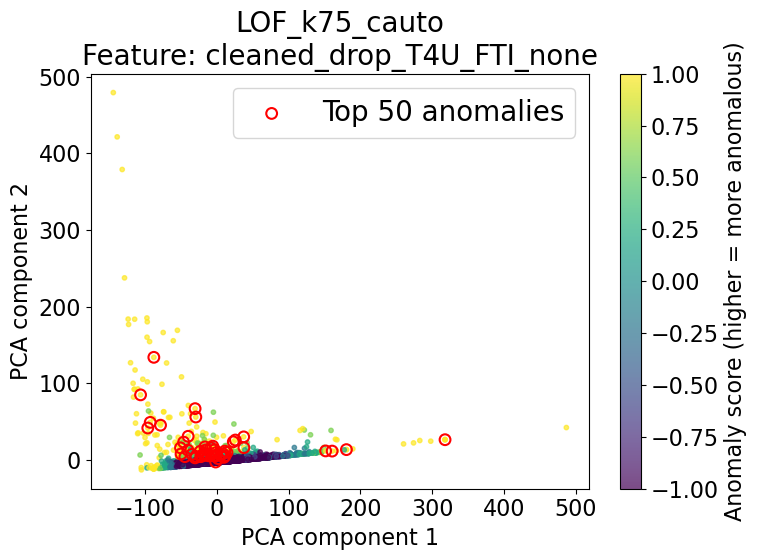

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
import numpy as np
import pandas as pd

# scale the age for better visualization
X_copy = X.copy()
X_copy['Age'] = X_copy['Age'].apply(lambda x: x/(10**int(np.log10(x)+1)) if x > 1 else x)

X_processed, _, _ = preprocess_data(X_copy, numeric_features, binary_features, 
                                    preprocess=best_param_dicts['preprocess'],
                                    columns_drop=['T4U_measured', 'FTI_measured'])

anomaly_scores_best = best_param_dicts['final_scores']

print("Plotting 2D PCA for the best detector...")
# print params in best_param_dicts
for k, v in best_param_dicts.items():
    if k != 'final_scores':
        print(f"{k}: {v}")
        
plot_2D_PCA(X_processed, anomaly_scores_best, K=50, 
            title_suffix=best_param_dicts['detectors'], 
            feature_description="cleaned_drop_T4U_FTI_"+best_param_dicts['preprocess'])

# 10. Comparison between detectors

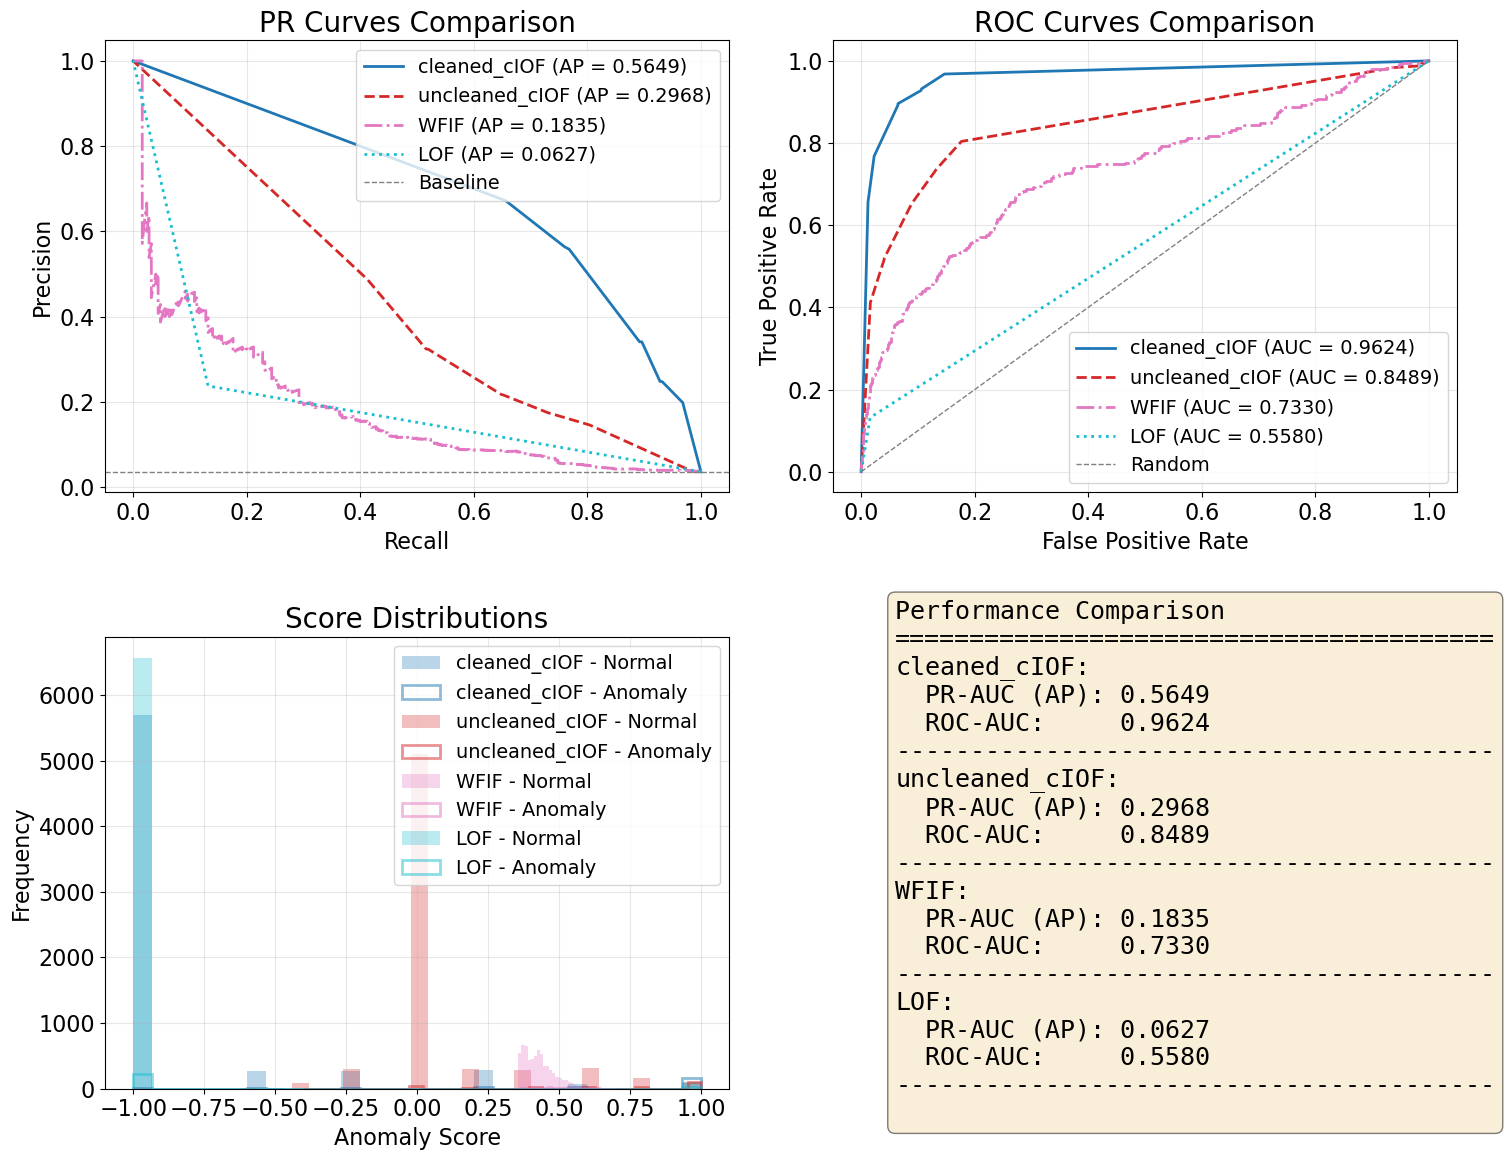

DETECTOR COMPARISON RESULTS
      Detector  PR-AUC (AP)  ROC-AUC
  cleaned_cIOF     0.564890 0.962379
uncleaned_cIOF     0.296755 0.848904
          WFIF     0.183487 0.732980
           LOF     0.062715 0.558049


In [24]:
def compare_multiple_detectors(scores_dict, y_true, detector_names=None):
    """
    对比多个检测器的性能
    
    Parameters:
    -----------
    scores_dict: dict
        检测器名称到异常分数的字典，例如：
        {
            'LOF_k75': scores_lof,
            'IForest': scores_iforest,
            'OCSVM': scores_ocsvm
        }
    y_true: array
        真实标签
    detector_names: list (optional)
        检测器名称列表，如果为None则使用scores_dict的keys
    """
    if detector_names is None:
        detector_names = list(scores_dict.keys())
    
    # 颜色和线型
    colors = plt.cm.tab10(np.linspace(0, 1, len(detector_names)))
    line_styles = ['-', '--', '-.', ':'] * (len(detector_names) // 4 + 1)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 准备存储结果的DataFrame
    results = []
    
    # 1. PR曲线对比
    for i, name in enumerate(detector_names):
        scores = scores_dict[name]
        precision, recall, _ = precision_recall_curve(y_true, scores)
        ap_score = average_precision_score(y_true, scores)
        
        axes[0, 0].plot(recall, precision, 
                        color=colors[i], 
                        linestyle=line_styles[i],
                        lw=2, 
                        label=f'{name} (AP = {ap_score:.4f})')
        
        # 存储结果
        fpr, tpr, _ = roc_curve(y_true, scores)
        roc_auc_val = auc(fpr, tpr)
        
        results.append({
            'Detector': name,
            'PR-AUC (AP)': ap_score,
            'ROC-AUC': roc_auc_val
        })
    
    axes[0, 0].axhline(y=sum(y_true)/len(y_true), color='gray', lw=1, 
                       linestyle='--', label='Baseline')
    axes[0, 0].set_xlabel('Recall')
    axes[0, 0].set_ylabel('Precision')
    axes[0, 0].set_title('PR Curves Comparison')
    axes[0, 0].legend(loc='upper right', fontsize='x-small')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. ROC曲线对比
    for i, name in enumerate(detector_names):
        scores = scores_dict[name]
        fpr, tpr, _ = roc_curve(y_true, scores)
        roc_auc_val = auc(fpr, tpr)
        
        axes[0, 1].plot(fpr, tpr, 
                        color=colors[i], 
                        linestyle=line_styles[i],
                        lw=2, 
                        label=f'{name} (AUC = {roc_auc_val:.4f})')
    
    axes[0, 1].plot([0, 1], [0, 1], color='gray', lw=1, 
                    linestyle='--', label='Random')
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curves Comparison')
    axes[0, 1].legend(loc='lower right', fontsize='x-small')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. 异常分数分布
    for i, name in enumerate(detector_names):
        scores = scores_dict[name]
        axes[1, 0].hist(scores[y_true == 0], bins=30, alpha=0.3, 
                        color=colors[i], label=f'{name} - Normal')
        axes[1, 0].hist(scores[y_true == 1], bins=30, alpha=0.5, 
                        color=colors[i], label=f'{name} - Anomaly',
                        histtype='step', lw=2)
    
    axes[1, 0].set_xlabel('Anomaly Score')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Score Distributions')
    axes[1, 0].legend(loc='upper right', fontsize='x-small')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. 性能指标表格
    axes[1, 1].axis('off')
    
    # 创建结果DataFrame并排序
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('PR-AUC (AP)', ascending=False)
    
    # 生成表格文本
    table_text = "Performance Comparison\n"
    table_text += "=" * 40 + "\n"
    for idx, row in results_df.iterrows():
        table_text += f"{row['Detector']}:\n"
        table_text += f"  PR-AUC (AP): {row['PR-AUC (AP)']:.4f}\n"
        table_text += f"  ROC-AUC:     {row['ROC-AUC']:.4f}\n"
        table_text += "-" * 40 + "\n"
    
    axes[1, 1].text(0.1, 0.5, table_text, fontsize=18, 
                    verticalalignment='center', fontfamily='monospace',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # 打印结果
    print("="*60)
    print("DETECTOR COMPARISON RESULTS")
    print("="*60)
    print(results_df.to_string(index=False))
    
    return results_df

# 使用示例
if __name__ == "__main__":
    # 假设您有多个检测器的分数
    scores_dict = {
        'cleaned_cIOF': anomaly_scores_best,  # 您的主要检测器
        'uncleaned_cIOF': best_param_dicts_uncleaned['final_scores'],  # 另一个检测器
        'WFIF': anomaly_scores_fw,  # 假设您有其他检测器
        'LOF': anomaly_scores_lof,
        # 'OCSVM': ocsvm_scores,
    }
    
    # 运行对比
    results_df = compare_multiple_detectors(scores_dict, y)

# 11. Clinical knowledge acquired from detectors and outlier

In [25]:
# 筛选出前50个样本
topK_idx = np.where(anomaly_scores_best >= 1)[0]
precision_at_50 = np.mean(y.iloc[topK_idx])
df_final = pd.DataFrame(X, columns=numeric_features + binary_features)
df_final['anomaly_score'] = anomaly_scores_best
df_final['Outlier_label'] = y.values
df_final = df_final.iloc[topK_idx]

# 创建note列：列出所有binary_features为1的特征
def create_note(row):
    notes = []
    for feature in binary_features:
        if row[feature] == 1:
            # 获取可读的特征名（去掉可能的后缀）
            readable_name = feature.replace('_measured', '').replace('_', ' ')
            notes.append(readable_name)
    return ', '.join(notes) if notes else 'No binary features'

df_final['note'] = df_final.apply(create_note, axis=1)

# 只保留numeric features和note列
columns_to_keep = numeric_features + ['anomaly_score', 'Outlier_label', 'note']
df_final_simple = df_final[columns_to_keep]

print(f"Precision@{len(topK_idx)}: {precision_at_50:.4f}")
print("Final DataFrame shape:", df_final_simple.shape)

# 展示前40行
display(df_final_simple.head(50))

# 保存
# df_final_simple.to_csv('top_anomalies_with_notes.csv', index=False)

Precision@244: 0.6721
Final DataFrame shape: (244, 9)


,Age,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,anomaly_score,Outlier_label,note
0,0.45,61.00,6.00,23.00,0.87,26.00,1.0,1,Sex
1,0.61,29.00,1.50,61.00,0.96,64.00,1.0,1,sick
2,0.16,29.00,1.90,58.00,1.03,56.00,1.0,1,"on thyroxine, tumor"
3,0.85,114.00,3.00,24.00,0.61,39.00,1.0,1,No binary features
4,0.75,49.00,3.00,5.00,1.16,4.00,1.0,1,Sex
5,0.85,197.00,0.96,31.21,1.02,30.42,1.0,1,query hypothyroid
6,0.85,197.00,0.96,14.00,0.62,23.00,1.0,1,No binary features
7,0.49,96.00,4.00,2.90,1.20,2.40,1.0,1,Sex
8,0.51,131.00,3.00,8.39,1.01,8.29,1.0,1,No binary features
9,0.72,85.00,6.00,22.00,1.11,20.00,1.0,1,on thyroxine


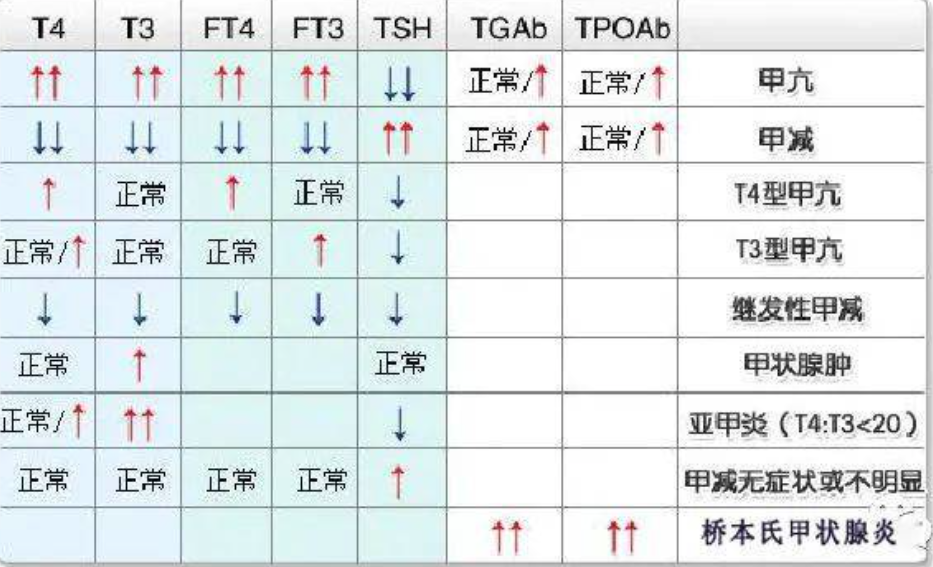

In [26]:
# 筛选query_hyperthyroid为1的样本，甲亢，理论上为低TSH值，高的T3和TT4
df_query_hyperthyroid = df_final[df_final['query_hyperthyroid'] == 1]

def highlight_conditions(row):
    """
    如果三个条件都满足，则高亮整行为橙色
    条件：TSH>5, T3<2.0, TT4<130.0
    """
    conditions_met = (row['TSH'] > 5) and (row['T3_measured'] < 2.0) and (row['TT4_measured'] < 130.0)
    return ['background-color: green'] * len(row) if conditions_met else [''] * len(row)

def highlight_tsh(val):
    color = 'red' if val > 5 else ''
    return f'background-color: {color}' if color else ''

def highlight_outlier(val):
    color = 'yellow' if val == 1 else ''
    return f'background-color: {color}' if color else ''

def highlight_t3(val):
    color = 'red' if val < 2.0 else ''
    return f'background-color: {color}' if color else ''

def highlight_tt4(val):
    color = 'red' if val < 130.0 else ''
    return f'background-color: {color}' if color else ''

# 创建样式对象
styled_df = df_query_hyperthyroid[['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'anomaly_score', 'Outlier_label', 'note']].style

# 首先应用整行高亮（条件：TSH>5, T3<2.0, TT4<130.0）
styled_df = styled_df.apply(highlight_conditions, axis=1)

# 然后应用单个条件的高亮（这些会覆盖整行高亮中的对应单元格）
styled_df = styled_df.applymap(highlight_tsh, subset=['TSH'])
styled_df = styled_df.applymap(highlight_outlier, subset=['Outlier_label'])
styled_df = styled_df.applymap(highlight_t3, subset=['T3_measured'])
styled_df = styled_df.applymap(highlight_tt4, subset=['TT4_measured'])

display(styled_df)

,Age,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,anomaly_score,Outlier_label,note
17,0.660000,48.000000,4.000000,12.000000,1.350000,9.090000,1.000000,1,"query hypothyroid, query hyperthyroid"
19,0.460000,35.000000,1.200000,16.000000,0.860000,19.000000,1.000000,1,query hyperthyroid
27,0.450000,22.000000,0.960000,65.000000,1.150000,57.000000,1.000000,1,query hyperthyroid
57,0.560000,65.000000,0.960000,49.000000,0.950000,52.000000,1.000000,1,query hyperthyroid
66,0.850000,32.000000,0.960000,55.000000,0.890000,62.000000,1.000000,1,query hyperthyroid
78,0.770000,12.000000,1.700000,123.000000,1.030000,120.000000,1.000000,1,query hyperthyroid
108,0.390000,8.890000,1.700000,97.000000,0.880000,111.000000,1.000000,1,query hyperthyroid
132,0.730000,17.000000,1.700000,112.000000,1.160000,97.000000,1.000000,1,query hyperthyroid
164,0.480000,6.600000,1.500000,111.000000,0.860000,129.000000,1.000000,1,query hyperthyroid
204,0.710000,9.890000,1.800000,89.000000,0.990000,90.000000,1.000000,1,query hyperthyroid


In [27]:
# 筛选query hypothyroid为1的样本，甲减，理论上为高TSH值，低的T3和TT4
df_query_hypothyroid = df_final[df_final['query_hypothyroid'] == 1]
def highlight_conditions(row):
    """
    如果三个条件都满足，则高亮整行为橙色
    条件：TSH>10, T3<2.0, TT4<100.0
    """
    conditions_met = (row['TSH'] > 10) and (row['T3_measured'] < 2.0) and (row['TT4_measured'] < 100.0)
    return ['background-color: green'] * len(row) if conditions_met else [''] * len(row)
def highlight_tsh(val):
    color = 'red' if val > 10 else ''
    return f'background-color: {color}' if color else ''
def highlight_outlier(val):
    color = 'yellow' if val == 1 else ''
    return f'background-color: {color}' if color else ''
def highlight_t3(val):
    color = 'red' if val < 2.0 else ''
    return f'background-color: {color}' if color else ''
def highlight_tt4(val):
    color = 'red' if val < 100.0 else ''
    return f'background-color: {color}' if color else ''

styled_df_hypo = df_query_hypothyroid[['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'anomaly_score', 'Outlier_label', 'note']].style.apply(highlight_conditions, axis=1)
styled_df_hypo = styled_df_hypo.applymap(highlight_outlier, subset=['Outlier_label']).applymap(highlight_t3, subset=['T3_measured']).applymap(highlight_tt4, subset=['TT4_measured'])
styled_df_hypo = styled_df_hypo.applymap(highlight_tsh, subset=['TSH'])
display(styled_df_hypo)

,Age,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,anomaly_score,Outlier_label,note
5,0.850000,197.000000,0.960000,31.210000,1.020000,30.420000,1.000000,1,query hypothyroid
12,0.660000,20.000000,0.960000,42.000000,0.980000,43.000000,1.000000,1,query hypothyroid
15,0.420000,114.000000,0.800000,4.060000,1.040000,3.840000,1.000000,1,query hypothyroid
17,0.660000,48.000000,4.000000,12.000000,1.350000,9.090000,1.000000,1,"query hypothyroid, query hyperthyroid"
20,0.890000,14.000000,0.960000,31.210000,1.020000,30.420000,1.000000,1,query hypothyroid
21,0.670000,44.000000,0.960000,31.000000,1.040000,29.000000,1.000000,1,query hypothyroid
22,0.660000,48.000000,5.000000,4.190000,1.360000,3.100000,1.000000,1,query hypothyroid
43,0.870000,176.000000,0.960000,52.000000,1.230000,42.000000,1.000000,1,query hypothyroid
52,0.720000,192.000000,0.960000,31.210000,1.020000,30.420000,1.000000,1,query hypothyroid
53,0.610000,109.000000,1.300000,44.000000,0.980000,45.000000,1.000000,1,query hypothyroid


In [28]:
# 筛选on thyroxine为1的样本，服用左甲状腺素，TSH应该下降，TT4和FTI上升，T3达到正常水平
df_on_thyroxine = df_final[df_final['on_thyroxine'] == 1]
def highlight_conditions(row):
    """
    如果三个条件都满足，则高亮整行为绿色
    条件：TT4<90.0, TSH>0.5, T3<2.0
    """
    conditions_met = (row['TT4_measured'] < 90.0) and (row['TSH'] > 0.5) and (row['T3_measured'] < 2.0)
    return ['background-color: green'] * len(row) if conditions_met else [''] * len(row)
def highlight_tt4(val):
    color = 'red' if val < 90.0 else ''
    return f'background-color: {color}' if color else ''
def highlight_low_tsh(val):
    color = 'red' if val > 0.5 else ''
    return f'background-color: {color}' if color else ''
def highlight_low_t3(val):
    color = 'red' if val < 2 else ''
    return f'background-color: {color}' if color else ''
styled_df_thyroxine = df_on_thyroxine[['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'anomaly_score', 'Outlier_label', 'note']].style.apply(highlight_conditions, axis=1)
styled_df_thyroxine = styled_df_thyroxine.applymap(highlight_low_tsh, subset=['TSH']).applymap(highlight_tt4, subset=['TT4_measured'])
styled_df_thyroxine = styled_df_thyroxine.applymap(highlight_low_t3, subset=['T3_measured']).applymap(highlight_outlier, subset=['Outlier_label'])
display(styled_df_thyroxine)

,Age,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,anomaly_score,Outlier_label,note
2,0.160000,29.000000,1.900000,58.000000,1.030000,56.000000,1.000000,1,"on thyroxine, tumor"
9,0.720000,85.000000,6.000000,22.000000,1.110000,20.000000,1.000000,1,on thyroxine
18,0.190000,164.000000,0.960000,65.000000,1.590000,41.000000,1.000000,1,on thyroxine
30,0.710000,29.000000,0.960000,57.000000,1.080000,53.000000,1.000000,1,on thyroxine
38,0.160000,252.000000,1.700000,5.000000,1.080000,5.000000,1.000000,1,on thyroxine
50,0.310000,166.000000,6.000000,32.000000,1.040000,31.000000,1.000000,1,on thyroxine
62,0.310000,49.000000,0.960000,87.000000,1.350000,64.000000,1.000000,1,on thyroxine
67,0.590000,30.000000,1.100000,45.000000,0.910000,49.000000,1.000000,1,on thyroxine
338,0.420000,55.000000,2.010000,77.000000,0.970000,80.000000,1.000000,0,"Sex, on thyroxine"
509,0.500000,67.000000,0.700000,80.000000,1.070000,74.000000,1.000000,0,"on thyroxine, query hypothyroid"
